#todo
look at missing data

#### Data dictionary

##### session_id
E.g. ​65_283174c5-551c-4c1b-954b-cb60ffcc2aec - unique identifier for the session that this row is a part of

##### session_position
{1-20} - position of row within session

##### session_length
{10-20} - number of rows in session

##### track_id_clean
E.g. ​t_13d34e4b-dc9b-4535-963d-419afa8332ec - unique identifier for the track played. This is linked with track_id in the track features and metadata table.

##### skip_1
Boolean indicating if the track was only played very briefly

##### skip_2
Boolean indicating if the track was only played briefly

##### skip_3
Boolean indicating if most of the track was played

##### not_skipped
Boolean indicating that the track was played in its entirety

##### context_switch
Boolean indicating if the user changed context between the previous row and the current row. This could for example occur if the user switched from one playlist to another.

##### no_pause_before_play
Boolean indicating if there was no pause between playback of the previous track and this track

##### short_pause_before_play
  Boolean indicating if there was a short pause between playback of the previous track and this track

##### long_pause_before_play
   Boolean indicating if there was a long pause between playback of the previous track and this track

##### hist_user_behavior_n_seekfwd
   Number of times the user did a seek forward within track

##### hist_user_behavior_n_seekback
   Number of times the user did a seek back within track

##### hist_user_behavior_is_shuffle
   Boolean indicating if the user encountered this track while shuffle mode was activated

##### hour_of_day
   {0-23} - The hour of day
##### date
    E.g. 2018-09-18 - The date

##### premium
 Boolean indicating if the user was on premium or not. This has potential implications for skipping behavior.

##### context_type
   E.g. ​editorial playlist - w​ hat type of context the playback occurred within
#####      hist_user_behavior_reason_start
   E.g. ​fwdbtn​ - the user action which led to the current track being played

##### hist_user_behavior_reason_end
   E.g. ​trackdone​ - the user action which led to the current track playback ending
 The schema for the track metadata and features is given below, each row has the following fields, with corresponding values

##### track_id
 E.g. ​t_13d34e4b-dc9b-4535-963d-419afa8332ec - unique identifier for the track played. This is linked with track_id_clean in the session logs

##### track_uri
   Spotify URI of track

##### track_name
   Name of track

##### artist
   Name of artist(s)
 
##### duration
  Length of track in seconds
 
##### release_date_estimate
    Estimate of when the track was released

##### us_popularity_estimate
 Estimate of the US popularity percentile of the track as of October 12, 2018
 
##### album_name
    Name of an album associated with this track. This might not be the ‘real’ album of the track
    
##### acousticness
 See https://developer.spotify.com/documentation/ web-api/reference/tracks/get-audio-features/
     
##### beat_strength   bounciness  danceability      dyn_range_mean      energy      flatness      instrumentalness      key liveness loudness mechanism mode organism speechiness tempo time_signature valence
    See acousticness
   
##### acoustic_vector_X
 See ​http://benanne.github.io/2014/08/05/spotify-cnns.html​ and http://papers.nips.cc/paper/5004-deep-content-based-
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_path = 'data/mini/' # point this to your data folder


In [3]:
!ls 'data/mini/training_set/'

log_mini.csv


In [4]:
df = pd.read_csv(data_path+'training_set/log_mini.csv')

In [5]:
df.describe()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,14.193084
std,5.457638,3.422025,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,5.996243
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,9.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000
75%,14.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000
max,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,60.000000,151.000000,23.000000


In [6]:
df.sample(10)

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
45973,0_03f6c794-1c66-4361-a972-3ce551b8c843,18,20,t_bb57c6c6-dbf9-4740-8a6c-114718cc297d,False,False,True,False,0,1,...,0,0,0,False,11,2018-07-15,True,user_collection,trackdone,fwdbtn
135911,0_0bed4d17-5ac0-48d3-9820-4d6a2cc2a6c9,6,20,t_fbc9b2d0-952d-4a8b-ac06-5e27e062810d,False,False,False,True,0,1,...,0,0,0,False,5,2018-07-15,True,catalog,trackdone,trackdone
154211,0_0d7e83e4-a937-4e88-aa73-f643f4eca132,1,20,t_9229bbff-130d-4668-8e84-6b35c7b7cea0,False,False,False,True,0,0,...,0,0,0,False,15,2018-07-15,False,user_collection,trackdone,trackdone
41074,0_038b675a-bd83-48ff-b0a9-400d6eb0e2f0,3,20,t_9833d3c8-0a5f-4553-9060-ad101a0504b6,False,True,True,False,0,0,...,1,0,0,True,18,2018-07-15,True,user_collection,trackdone,fwdbtn
21423,0_01dd2920-01ec-488d-99f9-593c09d189ab,11,11,t_ee3097b2-6525-4af1-a55c-6fb666b94b82,True,True,True,False,0,1,...,0,0,0,True,5,2018-07-15,False,catalog,fwdbtn,fwdbtn
6689,0_008d1b15-f6b4-4bdf-b124-6ed39b12d362,15,20,t_f965acbd-b738-4d3b-92c0-baee4b09d6e6,True,True,True,False,0,1,...,0,0,0,False,16,2018-07-15,False,user_collection,fwdbtn,fwdbtn
139291,0_0c37b094-e98c-4432-ae35-6f8992f3b8c5,2,16,t_e24e49a7-b7ff-472d-873c-2349534fe3c5,True,True,True,False,0,1,...,0,0,0,False,14,2018-07-15,True,user_collection,trackdone,backbtn
47677,0_041b2cb7-f881-41df-b4b8-14b5459c1dd3,13,20,t_ec158616-94d4-4904-b627-8d9673fbe2c5,False,False,False,True,0,0,...,1,0,0,True,21,2018-07-14,True,user_collection,trackdone,trackdone
102966,0_08fd8d3d-ddd1-4ea9-a05e-156e42dfb345,8,14,t_46f35b15-c9ff-4d6f-913d-1c322d48cfc7,False,False,True,False,0,1,...,0,0,0,False,13,2018-07-15,True,catalog,fwdbtn,fwdbtn
73728,0_065abdaf-20ec-44b9-be84-27f550ae8444,19,20,t_29f7763e-4aa6-444c-8174-fab0530151c9,False,True,True,False,0,1,...,0,0,0,True,9,2018-07-15,True,user_collection,fwdbtn,fwdbtn


**Let's see how many unique session IDs ('session_id') there are in our dataset**

In [7]:
user_count = df["session_id"].unique().size
entry_count = df.shape[0]

In [8]:
f'This sample dataset consists of {user_count} users, \
who listened (or didnt listen ;)) to {entry_count} tracks in total.'


'This sample dataset consists of 10000 users, who listened (or didnt listen ;)) to 167880 tracks in total.'

#### Show data of a single user

Let's investigate a single user ID to get a better understanding of how the data is structured 

In [9]:
df[df["session_id"].eq('0_00006f66-33e5-4de7-a324-2d18e439fc1e')].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
session_id,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e
session_position,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
session_length,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
track_id_clean,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,t_c815228b-3212-4f9e-9d4f-9cb19b248184,t_e23c19f5-4c32-4557-aa44-81372c2e3705,t_0be6eced-f56f-48bd-8086-f2e0b760fdee,t_f3ecbd3b-9e8e-4557-b8e0-39cfcd7e65dd,t_2af4dfa0-7df3-4b7e-b7ab-353ba48237f9,t_79570b2a-639a-4ec0-9853-71c5299ac44d,t_69016f19-84aa-40c0-afa9-54404397b7a2,t_59dc3fcd-7aec-4da5-a747-b59b19bab3bb,t_a157ba98-7eae-4e7d-99d5-ed760b2c0978,t_87d95b75-af5c-4ef6-8dc4-cd888ae17cce,t_db945033-3dc5-4a22-8889-c72fd2781299,t_bff5b6c6-6968-41be-b723-7e860b372975,t_bf496d77-9eb2-4fe1-80f7-2c7ecd6f9b8e,t_1051bc37-1a73-4301-812b-f83ae0c9bbcd,t_358c9cce-7a1e-4dd4-81de-206dda80363f
skip_1,False,False,False,False,False,False,True,True,False,True,True,True,True,False,False,False,False,False,True,True
skip_2,False,False,False,False,False,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True
skip_3,False,False,False,False,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True
not_skipped,True,True,True,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
context_switch,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
no_pause_before_play,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1


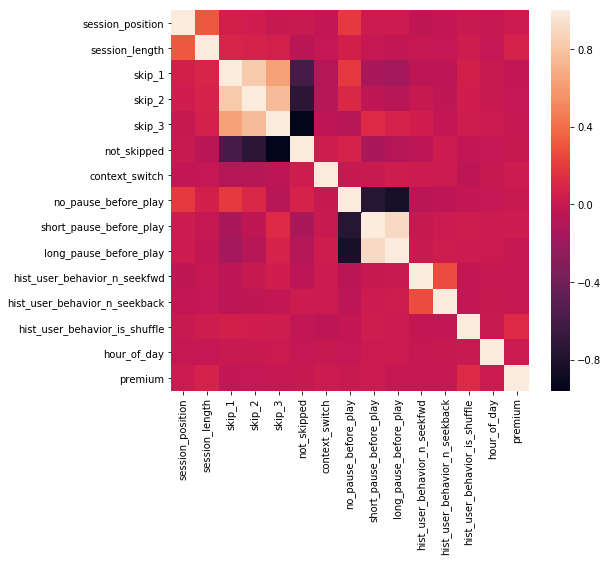

In [10]:
corr = df.corr(method='pearson')
plt.figure(figsize = (8,7))

g = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
               )

##### session_length

In [11]:
df["session_length"].value_counts()

20    101320
11      8272
10      8190
12      7752
13      7111
15      6525
14      6426
19      5966
18      5454
17      5440
16      5424
Name: session_length, dtype: int64

###### skip_1, skip_2, skip_3

In [12]:
df[["skip_1", "skip_2", "skip_3", "not_skipped"]].isna().sum()

skip_1         0
skip_2         0
skip_3         0
not_skipped    0
dtype: int64

In [13]:
df["not_skipped"].value_counts(dropna=False)

False    111996
True      55884
Name: not_skipped, dtype: int64

In [14]:
df.groupby(["skip_1", "skip_2", "skip_3", "not_skipped"]).describe()

context_switch                                \
                                          count      mean       std  min  25%   
skip_1 skip_2 skip_3 not_skipped                                                
False  False  False  False               3145.0  0.078219  0.268559  0.0  0.0   
                     True               55884.0  0.050891  0.219777  0.0  0.0   
              True   False              22027.0  0.065783  0.247908  0.0  0.0   
       True   False  False                  1.0  0.000000       NaN  0.0  0.0   
              True   False              16061.0  0.061142  0.239598  0.0  0.0   
True   True   True   False              70762.0  0.019022  0.136601  0.0  0.0   

                                                hist_user_behavior_n_seekback  \
                                  50%  75%  max                         count   
skip_1 skip_2 skip_3 not_skipped                                                
False  False  False  False        0.0  0.0  1.0                        3145.0   
                     True         0.0  0.0  1.0                       55884.0   
              True   False        0.0  0.0  1.0                       22027.0   
       True   False  False        0.0  0.0  0.0                           1.0   
              True   False        0.0  0.0  1.0                       16061.0   
True   True   True   False        0.0  0.0  1.0                       70762.0   

                                           ...  session_position        \
                                      mean ...               75%   max   
skip_1 skip_2 skip_3 not_skipped           ...                           
False  False  False  False        0.060731 ...              13.0  20.0   
                     True         0.064401 ...              14.0  20.0   
              True   False        0.083488 ...              13.0  20.0   
       True   False  False        1.000000 ...               6.0   6.0   
              True   False        0.089036 ...              13.0  20.0   
True   True   True   False        0.009977 ...              14.0  20.0   

                                 short_pause_before_play                      \
                                                   count      mean       std   
skip_1 skip_2 skip_3 not_skipped                                               
False  False  False  False                        3145.0  0.216852  0.412167   
                     True                        55884.0  0.083047  0.275956   
              True   False                       22027.0  0.342852  0.474673   
       True   False  False                           1.0  1.000000       NaN   
              True   False                       16061.0  0.320902  0.466838   
True   True   True   False                       70762.0  0.093087  0.290556   

                                                           
                                  min  25%  50%  75%  max  
skip_1 skip_2 skip_3 not_skipped                           
False  False  False  False        0.0  0.0  0.0  0.0  1.0  
                     True         0.0  0.0  0.0  0.0  1.0  
              True   False        0.0  0.0  0.0  1.0  1.0  
       True   False  False        1.0  1.0  1.0  1.0  1.0  
              True   False        0.0  0.0  0.0  1.0  1.0  
True   True   True   False        0.0  0.0  0.0  0.0  1.0  

[6 rows x 72 columns]

Generally it seems indicating following intervals (0,t) (0,t+1) (0,t+2), so skip_3 will be true if skip_2 is true, 
skip_2 and skip_3 will be true if skip_1 is true.

This holds true for all observations except fo one, which has True value for skip_2 but not skip_3. 
It's curious that there's just one observation that's skipped during the time interval indicated by skip_2.

In [15]:
df["skip_state"] = np.nan

In [16]:
df.loc[df["skip_3"] == 1, 'skip_state'] = 3
df.loc[df["skip_2"] == 1, 'skip_state'] = 2
df.loc[df["skip_1"] == 1, 'skip_state'] = 1
df.loc[df["not_skipped"] == 1, 'skip_state'] = 0

In [17]:
df["skip_state"].value_counts(dropna=False).sum() == df.shape[0]

True

In [18]:
df["skip_state"].value_counts(dropna=False, sort=True, normalize=False).sort_index()

 0.0    55884
 1.0    70762
 2.0    16062
 3.0    22027
NaN      3145
Name: skip_state, dtype: int64

In [19]:
df["skip_state"].value_counts(dropna=False, sort=True, normalize=True).sort_index()

 0.0    0.332881
 1.0    0.421503
 2.0    0.095675
 3.0    0.131207
NaN     0.018734
Name: skip_state, dtype: float64

Since we had no missing values in the original set of skip-related variables, the nans are a consequence of all skip variables being set to 0

In [20]:
df['skip_state'].fillna(-1, inplace=True)

In [21]:
np.arange(-1,4)

array([-1,  0,  1,  2,  3])

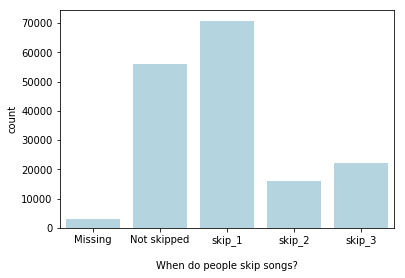

In [22]:
sns.countplot(x=df["skip_state"],color="lightblue")
plt.xticks(ticks=np.arange(0,5),labels=["Missing","Not skipped","skip_1","skip_2","skip_3"])
plt.xlabel("When do people skip songs?",labelpad=15)
plt.show()

I'll make some dummy vars indicating the skip_state

In [23]:
skip_state_dummies = pd.get_dummies(df["skip_state"], prefix="skip_state", prefix_sep='_', dummy_na=True,)
df = pd.concat([df, skip_state_dummies], axis=1)
df.columns

Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
       'skip_state', 'skip_state_-1.0', 'skip_state_0.0', 'skip_state_1.0',
       'skip_state_2.0', 'skip_state_3.0', 'skip_state_nan'],
      dtype='object')

In [44]:
df["skip_state"].value_counts()

 1.0    70762
 0.0    55884
 3.0    22027
 2.0    16062
-1.0     3145
Name: skip_state, dtype: int64

###### 'no_pause_before_play', 'long_pause_before_play', 'short_pause_before_play'

In [24]:
df.no_pause_before_play.value_counts(normalize=True,dropna=False)

1    0.767602
0    0.232398
Name: no_pause_before_play, dtype: float64

In [25]:
df[['no_pause_before_play', 'long_pause_before_play', 'short_pause_before_play']].isna().sum()

no_pause_before_play       0
long_pause_before_play     0
short_pause_before_play    0
dtype: int64

In most instances, there were no pauses before a song was played.

In [26]:
pd.crosstab([df['long_pause_before_play'], df['short_pause_before_play']],df["no_pause_before_play"])

no_pause_before_play                                0       1
long_pause_before_play short_pause_before_play               
0                      0                        10000  128865
1                      0                         4398       0
                       1                        24617       0

Again, the coding of these variables resembles that of the skip timing variables. There are many observations for which long and short pause is True, and some for which long pause is True and short pause is False. There are, however, no observations for which short pause is true and long pause is false. I'm not sure what to make out of it.

In [27]:
df["pause_before_playback"] = np.nan

In [28]:
df.loc[df["short_pause_before_play"] == 1, 'pause_before_playback'] = 1
df.loc[df["long_pause_before_play"] == 1, 'pause_before_playback'] = 2
df.loc[df["no_pause_before_play"] == 1, 'pause_before_playback'] = 0

In [29]:
df["pause_before_playback"].value_counts()

0.0    128865
2.0     29015
Name: pause_before_playback, dtype: int64

In [30]:
df["no_pause_before_play"].value_counts(dropna=False)

1    128865
0     39015
Name: no_pause_before_play, dtype: int64

In [31]:
df["pause_before_playback"].value_counts()

0.0    128865
2.0     29015
Name: pause_before_playback, dtype: int64

In [32]:
df.groupby(df["session_id"])["session_length","premium"].agg(['sum','mean'])

session_length      premium     
                                                  sum mean     sum mean
session_id                                                             
0_00006f66-33e5-4de7-a324-2d18e439fc1e            400   20    20.0  1.0
0_0000a72b-09ac-412f-b452-9b9e79bded8f            400   20    20.0  1.0
0_00010fc5-b79e-4cdf-bc4c-f140d0f99a3a            400   20    20.0  1.0
0_00016a3d-9076-4f67-918f-f29e3ce160dc            400   20    20.0  1.0
0_00018b58-deb8-4f98-ac5e-d7e01b346130            121   11    11.0  1.0
0_00027db1-ffe5-4b00-8eeb-8d8188451298            225   15    15.0  1.0
0_00029482-6542-4d3e-bb9e-ffc988f58bd6            225   15    15.0  1.0
0_0002fbb5-29c2-4d54-9636-e6d15e77b58c            400   20    20.0  1.0
0_00030fe3-298d-4930-8534-fc5a9b82971b            400   20     0.0  0.0
0_0003ac37-c70a-47a6-b9dc-b8b163826082            400   20    20.0  1.0
0_0003e8a0-ea43-47fe-ac5a-8b502f4d38ef            400   20    20.0  1.0
0_00041f88-6d8a-49ca-9a03-d0cfdbbafe5e            400   20    20.0  1.0
0_00052b3c-a5f9-4b04-90ef-6378777d89d8            400   20    20.0  1.0
0_00054512-7872-45c0-aaec-7b790f698a4f            361   19    19.0  1.0
0_0005a7a1-196e-4e08-8928-39b9a3ca2e1a            400   20    20.0  1.0
0_0006380b-324b-45db-a597-ac209b1375b2            100   10    10.0  1.0
0_000641b5-a2ce-4803-bdeb-499c548ba50d            400   20    20.0  1.0
0_00064a92-1353-417a-82e2-6f5e361bebff            289   17    17.0  1.0
0_0006bfe8-8afe-45c2-a423-00a348b775c4            400   20    20.0  1.0
0_0006f5f8-bd71-4d75-9cd2-6320f2e4df8e            400   20    20.0  1.0
0_00070b9a-c9da-404f-81d0-c22f4f79b933            169   13    13.0  1.0
0_00074d75-33c6-40b3-99e1-a88e9d015e42            225   15    15.0  1.0
0_00076eea-e6d9-4a1a-ad1a-dd083fd05a96            169   13    13.0  1.0
0_000796fd-ee8a-4211-a0a9-662154cb905d            169   13    13.0  1.0
0_00079a23-1600-486a-91bd-5208be0c745a            144   12    12.0  1.0
0_0007cd53-3aa5-49ba-9473-319d5d7b2534            400   20    20.0  1.0
0_000822a0-d9a2-4346-9fef-2b5d68e12bc2            169   13     0.0  0.0
0_00084b13-a3f2-4098-96b1-e30f767eba54            100   10    10.0  1.0
0_0008bd24-bbb0-4747-b777-7c97ce5ab3a9            400   20    20.0  1.0
0_0009367d-0072-4f19-8458-e291ddbbbd25            400   20    20.0  1.0
...                                               ...  ...     ...  ...
0_0ea0f8d9-779a-4e62-8335-c8864d63bdae            400   20    20.0  1.0
0_0ea14f73-464c-4ef5-86fe-8d6a842a031b            144   12     0.0  0.0
0_0ea2015c-84ff-465e-871d-5be6cce7dc49            100   10     0.0  0.0
0_0ea20d11-293c-4cbe-8b91-f31701773a1a            225   15    15.0  1.0
0_0ea2ef38-66c1-4566-8d60-0bf3b3cb0f3f            196   14    14.0  1.0
0_0ea2f112-878a-4be1-80c4-ad54e1404597            400   20    20.0  1.0
0_0ea30f06-e4b2-4890-9a5c-8f4bc271baeb            196   14    14.0  1.0
0_0ea4111e-c010-4d0c-ad79-9f20ba074fd8            400   20    20.0  1.0
0_0ea5c726-ab48-4b66-9abb-218351ccc36c            289   17    17.0  1.0
0_0ea62357-c83f-4f9f-8a49-c0d701c19141            400   20    20.0  1.0
0_0ea63dcd-99c2-4428-99b3-4c451304cf1e            169   13    13.0  1.0
0_0ea667bb-be2b-4e5e-bdca-087951b43444            400   20    20.0  1.0
0_0ea68eef-c2d7-4670-b87f-e5d7df22c9cf            100   10    10.0  1.0
0_0ea6dab7-7f86-46b3-a35e-6c6ea9dbebd8            400   20    20.0  1.0
0_0ea6f2b9-7c2b-4040-94f5-87bb75cd384f            100   10    10.0  1.0
0_0ea75a3d-9151-444e-a7d2-df2b97d89e05            400   20     0.0  0.0
0_0ea939f1-8972-4b2c-af64-8e72d30a58ac            400   20    20.0  1.0
0_0ea93eb0-ab93-44ac-93de-629ed7074696            169   13    13.0  1.0
0_0ea956f2-3424-4b7b-8812-1da3344f077f            400   20     0.0  0.0
0_0ea9b116-d348-441e-8256-cbfbbab31382            256   16    16.0  1.0
0_0ea9c6c6-25aa-48d5-b25f-a08e582238e0            400   20    20.0  1.0
0_0eaa8378-d24f-465b-b299-dbe9822f2970            400   20    20.0  1.0
0_0eaa8

make 